In [16]:
import numpy as np
from acm.observables import BaseCombinedObservable as CombinedObservable
from acm.projects.bgs import *

from priors import get_priors
from control_plots import plot_triangle

In [19]:
# From the data files
select_filters = {
    'cosmo_idx': 0,
    'hod_idx': 96,
}

Observable = CombinedObservable([
    GalaxyCorrelationFunctionMultipoles(
        select_filters=select_filters,
    ),
    DensitySplitCorrelationFunctionMultipoles(
        select_filters=select_filters,
    ),
])

statistics = [Observable] + Observable.observables
stat = statistics[0]

truth = stat.lhc_x
data_vector = stat.lhc_y
cov = stat.get_covariance_matrix()
data_error = np.sqrt(np.diag(cov))
pred = stat.get_model_prediction(truth)

Removed no burn in


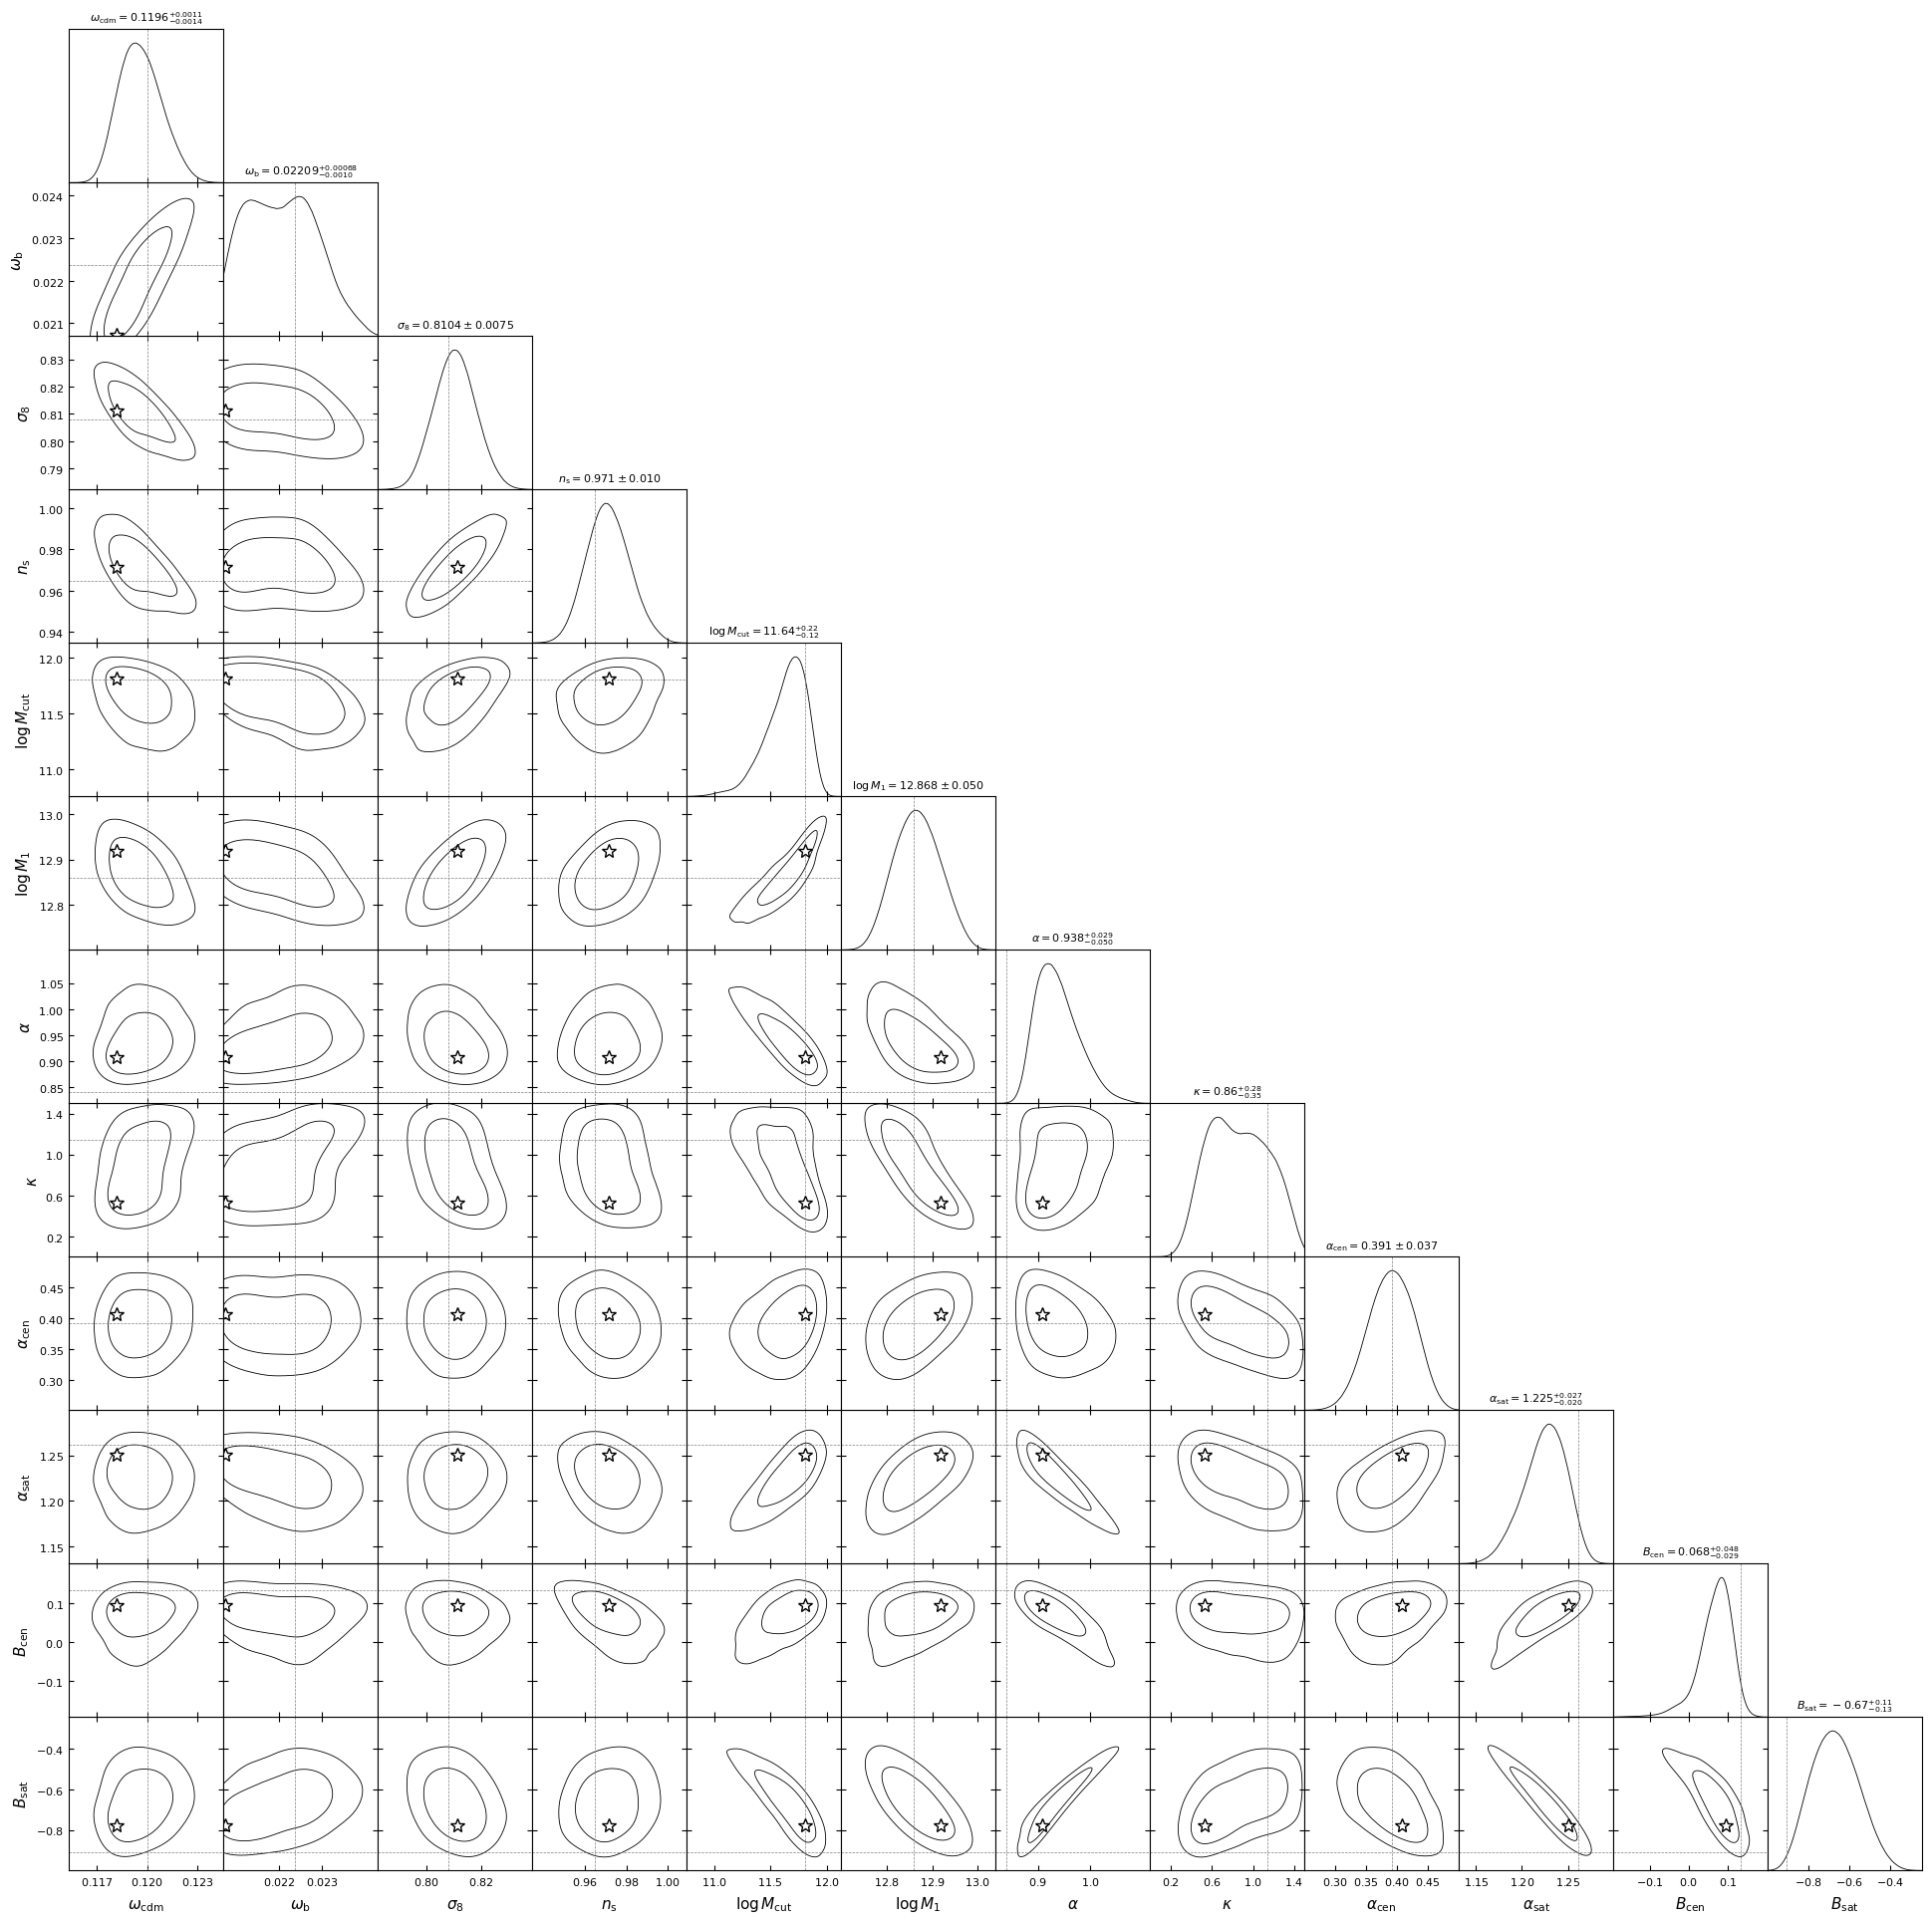

In [21]:
# From the chains
chain_dir = f'/pscratch/sd/s/sbouchar/acm/bgs/chains/fixed_sigma/c000_hod096/'
stat_name = "+".join(stat.stat_name) if isinstance(stat.stat_name, list) else stat.stat_name
fname = f'{stat_name}_chain.npy'
chain = np.load(f"{chain_dir}/{fname}", allow_pickle=True).item()

priors, ranges, labels = get_priors(cosmo=True, custom_hod=True)
priors = {key: priors[key] for key in stat.lhc_x_names}
fixed_parameters = ['w0_fld', 'wa_fld', 'nrun', 'N_ur', 'sigma']

markers = {key: stat.lhc_x[stat.lhc_x_names.index(key)] for key in stat.lhc_x_names if key not in fixed_parameters}

g = plot_triangle(chain, priors, labels, ranges, fixed_parameters, add_bestfit=True, markers=markers, title_limit=1)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.show()